In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')


In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(df.describe())
print(df.head())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16    

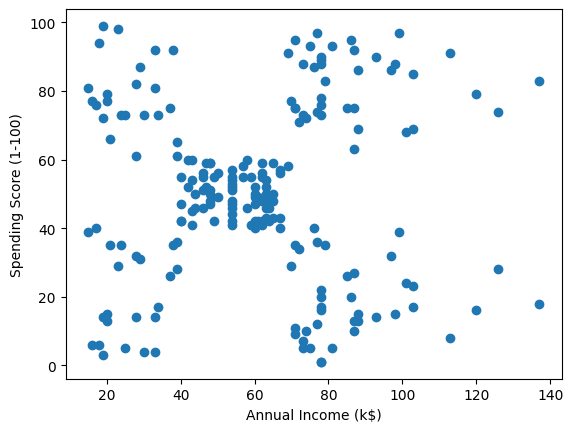

In [5]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [6]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_


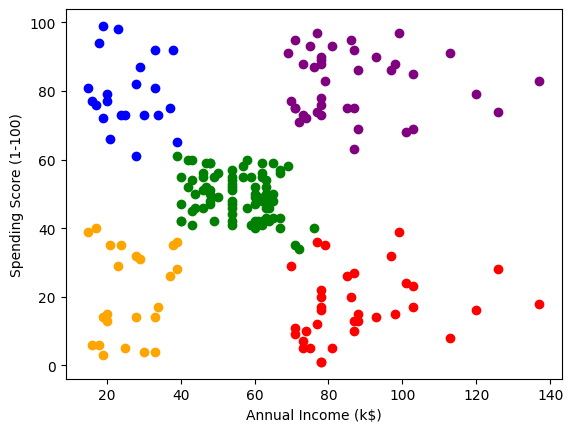

In [7]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(len(colors)):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'], color=colors[i])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [8]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        164.371429  41.114286           88.200000               17.114286
1         23.090909  25.272727           25.727273               79.363636
2         86.320988  42.716049           55.296296               49.518519
3         23.000000  45.217391           26.304348               20.913043
4        162.000000  32.692308           86.538462               82.128205


C:\Users\HARSH\AppData\Local\Temp\ipykernel_16436\2526074427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


In [9]:
high_spending = df[df['Cluster'] == 0]
budget_conscious = df[df['Cluster'] == 1]


In [10]:
# Example targeted marketing strategy for high-spending customers
high_spending_campaign = "Get 20% off your next purchase of $100 or more! Use code HSPEND20 at checkout."

# Example targeted marketing strategy for budget-conscious customers
budget_conscious_campaign = "Shop our budget-friendly collection! All items under $50."


In [11]:
# Example metric: Customer retention rate
initial_customers = len(df['CustomerID'].unique())
final_customers = len(high_spending['CustomerID'].unique())
retention_rate = final_customers / initial_customers
print("High-spending customer retention rate: ", retention_rate)


High-spending customer retention rate:  0.175
